In [165]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [166]:
def load_data(filename):
    #读取文件
    label = []
    datas = pd.read_csv(filename,sep='\t',header=None)
    data = datas.iloc[:,0:3]
    label = datas.iloc[:,-1]
    #利用sklearn的LabelEncoder将英文的标签映射成数字
    encoder = LabelEncoder()
    label = encoder.fit_transform(label)
    return data.values,label 

在数据清洗的过程中，可用label.value_counts()对数据列进行检查，看标签列或者特征列是否是固定的特征。
结果是：
print(label.value_counts())

...........
didntLike     342
smallDoses    331
largeDoses    327
Name: 3, dtype: int64


In [167]:
data,label=load_data('/Users/yangyang/Desktop/GitHub/Machine-learning-in-action/k-Nearest Neighbor/datingTestSet.txt')

可视化：使用matplotlib建立散点图

In [168]:
def plot(x,y):
    #np.where(cndition)  ->返回的是一个tuple，值是下标
    label1 = np.where(y == 0)
    plt.scatter(x[label1,0],x[label1,1],marker='x',color = 'r',label = 'didnt like = 0')
    label2 = np.where(y == 1)
    plt.scatter(x[label2,0],x[label2,1],marker='o',color = 'b',label = 'smallDoses = 1')
    label3 = np.where(y == 2)
    plt.scatter(x[label3,0],x[label3,1],marker='.',color = 'y',label = 'largeDoses = 2')
    plt.xlabel('plot distance')
    plt.ylabel('game time')
    plt.legend(loc = 'upper left')
    plt.show()

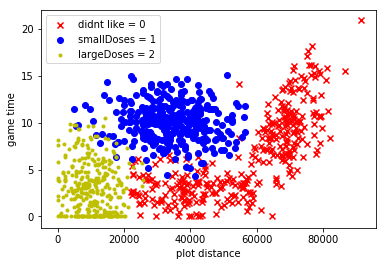

In [169]:
plot(data,label)

观察数据发现：在计算距离的时候，某一特征对最终的结果影响很大。但是如果所有特征是同等重要的，则需要降低这些特征对最终结果的影响。
所以需要数值归一化。

In [170]:
#公式 newvalue = (oldvalue - min)/(max - min)
def normalFeature(x):
    min = np.min(data,axis = 0)  #axis=0 ->按列计算
    max = np.max(data,axis = 0)
    x_new = (x - min) / (max - min)#矩阵运算：对应位相加减等运算
    return x_new,min,max
data_new, min ,max = normalFeature(data)
print(data_new)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


划分训练、测试数据集

In [171]:
rat = 0.1
m = data_new.shape[0]
m_test = int(m * rat)
train_data = data_new[m_test:m,:]
train_label = label[m_test:m]
test_data = data_new[0:m_test,:]
test_label = label[0:m_test]

np.argsort(x)对x进行排序，返回的是元素在原来元组的下标
np.bincount(x)对x中元素(0~max)范围内值出现频率的计算
np.argmax(x)去除x中元素最大值的下标

knn的实现

In [172]:
class knn(object):
    def __init__(self):
        pass
    def train(self,x,y):
        self.train_data = x
        self.train_label = y
    def distance(self,test_data):
        num_test_data = test_data.shape[0]
        num_train_data = self.train_data.shape[0]
        
        dist = np.zeros((num_test_data,num_train_data))#建立距离矩阵
        for i in range(num_test_data):
            dist[i] = np.sqrt(np.sum(np.square(self.train_data - test_data[i]),axis=1))
        return dist,dist.shape
    
    def predict(self,test_data,test_label,k = 1):
        dist,dist.shape = self.distance(test_data)
        m = test_data.shape[0]
        label_pred = np.zeros(m)
        for i in range(m):
            topk = []
            topk= self.train_label[np.argsort(dist[i])[:k]]#选取距离最小的k个标签
            label_pred[i] = np.argmax(np.bincount(topk))#返回的一直是下标(索引)
            if(i % 10 == 0):
                print('prediction is {},the real id {}'.format(label_pred[i],test_label[i]))
        return label_pred

In [173]:
classfiy = knn()
classfiy.train(train_data,train_label)
label_preds= classfiy.predict(test_data,test_label,k=3)


prediction is 1.0,the real id 1
prediction is 0.0,the real id 0
prediction is 2.0,the real id 2
prediction is 1.0,the real id 1
prediction is 0.0,the real id 0
prediction is 2.0,the real id 2
prediction is 0.0,the real id 0
prediction is 2.0,the real id 2
prediction is 0.0,the real id 0
prediction is 1.0,the real id 1


输出测试准确率

In [174]:
acc = np.mean(label_preds == test_label)
print(acc)

0.95


预测 数据[[10000,10,0.5]]

In [175]:
result = ['didnt like','large dose','small dose']
input = np.array([[10000,10,0.5]])
input_new = (input - min) / (max- min)
pred = classfiy.predict(input_new,test_data,k=3)
print(pred)
print('you will probablly like this {}'.format(result[int(pred[0])]))

prediction is 2.0,the real id [0.44832535 0.39805139 0.56233353]
[2.]
you will probablly like this small dose
